# RECOMMENDER USING NLP ON PRODUCT TITLE

5 phases
  1. Import libraries and loading dataset
  2. Preparing dataset by data exploration and clean-up
  3. Data preprocessing using Stop-word removal
  4. Creating IDF weighted Word2Vec for title and Brand using One Hot Encoder


## 1 Importing Libraries and Preparing Dataset 

### 1.1 Importing Libraries

In [1]:
# disable auto-scrolling

# %%javascript
# IPython.OutputArea.prototype._should_scroll = 9999;

In [2]:
# !pip install --upgrade tensorflow

In [12]:
from PIL import Image as PilImage
import itertools
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import gzip
import json
import warnings
import random
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import math
import time
import re
import os
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import pairwise_distances
from matplotlib import gridspec
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer
import pickle
#Deep-Learning Library
# from keras.preprocessing.image import ImageDataGenerator
# from keras.models import Sequential
# from keras.layers import Dropout, Flatten, Dense
# from keras import applications
import plotly
import plotly.figure_factory as ff
from plotly.graph_objs import Scatter, Layout

from IPython.display import display, Image, SVG, Math, YouTubeVideo

plotly.offline.init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")


### 1.2 Loading Dataset

In [13]:
path = './Data/amazon_reviews_us_Shoes_v1_00_help_voted_And_cut_lognTail.csv'

In [14]:
# turn dataset into a dataframe
csv_data = pd.read_csv(path)

In [15]:
csv_data.head()

,customer_id,product_id,star_rating,product_title,helpful_votes
0,50073594,B00FLH88CO,4,Norwegian Fleece Lined Winter Slippers,9
1,50073594,B00B3HW97Q,5,2 Pairs Foster Grant Womans Versa Polarized Su...,1
2,34778598,B00B3HW97Q,4,2 Pairs Foster Grant Womans Versa Polarized Su...,2
3,22272389,B00J62PECW,1,Skechers Women's Shelby's Zurich Snow Boot,1
4,12287747,B00J62PECW,5,Skechers Women's Shelby's Zurich Snow Boot,1


In [16]:
# look at the columns of the dataframe
csv_data.columns

Index(['customer_id', 'product_id', 'star_rating', 'product_title',
       'helpful_votes'],
      dtype='object')

In [17]:
# data['similar_item']

In [18]:
path = './Data/meta_Clothing_Shoes_and_Jewelry.json.gz'

In [19]:
f = gzip.open(path, 'rt', encoding='utf8')

lines = []
lines.append(f.readline())
lines

['{"category": ["Clothing, Shoes & Jewelry", "Costumes & Accessories", "Kids & Baby", "Girls", "Accessories", "3 layers of tulle", "6\\" long, stretched waist measures 11 1/2\\" across. Fits up to 7 years.", "Sequins line the edge of the tulle on the top layer.", "Great for babys up to about age 7", "Makes a Great gift for any princess"], "description": ["6\\" long, stretched waist measures 11 1/2\\" across. Fits up to 7 years."], "title": "Purple Sequin Tiny Dancer Tutu Ballet Dance Fairy Princess Costume Accessory", "brand": "Big Dreams", "feature": ["3 layers of tulle", "6\\" long, stretched waist measures 11 1/2\\" across. Fits up to 7 years.", "Sequins line the edge of the tulle on the top layer.", "Great for babys up to about age 7", "Makes a Great gift for any princess"], "rank": "19,963,069inClothing,ShoesJewelry(", "date": "5 star5 star (0%)", "asin": "0000037214"}\n']

In [20]:
# load json

dataset = []
for i in range(2685000):
    dataset.append(json.loads(f.readline()))

In [21]:
 # turn dataset into a dataframe
json_data = pd.DataFrame.from_dict(dataset)

In [22]:
json_data.head()

,category,description,title,image,brand,feature,rank,date,asin,also_view,price,fit,also_buy,main_cat,tech1,details,similar_item,tech2
0,"[Clothing, Shoes & Jewelry, Luggage & Travel G...",[The Hottest Bag in Town! Brand: Anello Condit...,Japan Anello Backpack Unisex LARGE LIGHT GRAY ...,[https://images-na.ssl-images-amazon.com/image...,Anello,"[Polyester Canvas Waterproof, Imported, Size: ...","4,537,420inClothing,ShoesJewelry(",5 star,0201377179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[Clothing, Shoes & Jewelry, Luggage & Travel G...",[The Hottest Bag in Town! Brand: Anello Condit...,Japan Anello Backpack Unisex PINK BEIGE LARGE ...,[https://images-na.ssl-images-amazon.com/image...,Anello,"[PU Leather, Imported, Size: Large PU Leather ...","3,994,472inClothing,ShoesJewelry(",5 star,0204444454,"[B07CJF5HLR, B01EBI8UH6, B01N1LR908, B074M4QKG...",$70.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[Clothing, Shoes & Jewelry, Luggage & Travel G...",[The Hottest Bag in Town! Brand: Anello Condit...,Japan Anello Backpack Unisex BLACK LARGE PU LE...,[https://images-na.ssl-images-amazon.com/image...,Anello,"[PU Leather, Imported, Size: Large PU Leather ...","635,761inClothing,ShoesJewelry(",5 star,0204444403,"[B01DLVYOPG, B07CJF5HLR, B01MSS59Y6, B071YBC1J...",$65.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[Clothing, Shoes & Jewelry, Novelty & More, Cl...",[Brand New. Hat Centre Length: adult about 8c...,bettyhome Unisex Adult Winter Spring Thicken C...,[https://images-na.ssl-images-amazon.com/image...,bettyhome,"[Imported, Plush,Cotton, Polyester, Lovely for...","5,061,041inClothing,ShoesJewelry(",5 star5 star (0%),0206313535,"[B00VGT93YS, B07FTY87LM, B01IKVOY8E, B01GF6C6F...",$18.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[Clothing, Shoes & Jewelry, Women, Clothing, S...",[Please allow 1-2cm dimension deviation. 100% ...,bettyhome Womens Lace Short Sleeves Top Printi...,[https://images-na.ssl-images-amazon.com/image...,bettyhome,"[Imported, Bohemia style, butterfly printing, ...","10,635,107inClothing,ShoesJewelry(",5 star,0206335962,NaN,$23.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
csv_data = csv_data.rename(columns={'product_id': 'asin'})
csv_data.head()

,customer_id,asin,star_rating,product_title,helpful_votes
0,50073594,B00FLH88CO,4,Norwegian Fleece Lined Winter Slippers,9
1,50073594,B00B3HW97Q,5,2 Pairs Foster Grant Womans Versa Polarized Su...,1
2,34778598,B00B3HW97Q,4,2 Pairs Foster Grant Womans Versa Polarized Su...,2
3,22272389,B00J62PECW,1,Skechers Women's Shelby's Zurich Snow Boot,1
4,12287747,B00J62PECW,5,Skechers Women's Shelby's Zurich Snow Boot,1


In [24]:
csv_data.shape

(155509, 5)

In [52]:
data = pd.merge(csv_data, json_data, how='left', on='asin')
data.shape

(155608, 22)

In [53]:
data.columns

Index(['customer_id', 'asin', 'star_rating', 'product_title', 'helpful_votes',
       'category', 'description', 'title', 'image', 'brand', 'feature', 'rank',
       'date', 'also_view', 'price', 'fit', 'also_buy', 'main_cat', 'tech1',
       'details', 'similar_item', 'tech2'],
      dtype='object')

In [54]:
data.head()

,customer_id,asin,star_rating,product_title,helpful_votes,category,description,title,image,brand,...,date,also_view,price,fit,also_buy,main_cat,tech1,details,similar_item,tech2
0,50073594,B00FLH88CO,4,Norwegian Fleece Lined Winter Slippers,9,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50073594,B00B3HW97Q,5,2 Pairs Foster Grant Womans Versa Polarized Su...,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,34778598,B00B3HW97Q,4,2 Pairs Foster Grant Womans Versa Polarized Su...,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22272389,B00J62PECW,1,Skechers Women's Shelby's Zurich Snow Boot,1,"[Clothing, Shoes & Jewelry, Women, Shoes, Outd...",[Warm snuggly style combines with even more co...,Skechers Women's Shelby's Zurich Snow Boot,[https://images-na.ssl-images-amazon.com/image...,NaN,...,5 star,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12287747,B00J62PECW,5,Skechers Women's Shelby's Zurich Snow Boot,1,"[Clothing, Shoes & Jewelry, Women, Shoes, Outd...",[Warm snuggly style combines with even more co...,Skechers Women's Shelby's Zurich Snow Boot,[https://images-na.ssl-images-amazon.com/image...,NaN,...,5 star,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2 Preparing Data

### 2.1 Removing Unnecessary features and Nan rows

In [55]:
# load only necessary columns for the model
data = data[['asin', 'brand', 'description', 'feature','image', 'title', 'price']]
print(data.head())
print(data.shape)

         asin brand                                        description  \
0  B00FLH88CO   NaN                                                NaN   
1  B00B3HW97Q   NaN                                                NaN   
2  B00B3HW97Q   NaN                                                NaN   
3  B00J62PECW   NaN  [Warm snuggly style combines with even more co...   
4  B00J62PECW   NaN  [Warm snuggly style combines with even more co...   

                                             feature  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  [100% Suede, Imported, none, Rubber sole, Rela...   
4  [100% Suede, Imported, none, Rubber sole, Rela...   

                                               image  \
0                                                NaN   
1                                                NaN   
2                                                N

In [56]:
# remove rows without images

# data = data.dropna(subset=['image'])
# data.shape

In [57]:
# only take the first image available for each product

# data.loc[:, 'image'] = data['image'].map(lambda x: x[0])

In [58]:
# pd.set_option('display.max_colwidth', -1)
# print(data.loc[:,'image'])

### 1.3 Data Exploration

In [61]:
print(data['brand'].describe())

count             18117
unique             2171
top       MG Collection
freq                792
Name: brand, dtype: object


In [62]:
brand_count = Counter(list(data['brand']))
brand_count.most_common(10)

[(nan, 137491),
 ('MG Collection', 792),
 ('Coach', 537),
 ('Michael Kors', 375),
 ('MICHAEL Michael Kors', 233),
 ('zeroUV', 202),
 ('Scarleton', 173),
 ('Merrell', 169),
 ('Dooney & Bourke', 163),
 ('Vionic', 157)]

In [63]:
print(data['title'].describe())

count                                                 27535
unique                                                15291
top       Shoe Horn Pro Comfort - Extra Long Handled Tel...
freq                                                     65
Name: title, dtype: object


In [64]:
data = data.loc[~data['title'].isnull()]
data.shape

(27535, 7)

In [65]:
data.columns

Index(['asin', 'brand', 'description', 'feature', 'image', 'title', 'price'], dtype='object')

In [66]:
# data = data.loc[~data['image'].isnull()]
# data.shape

### 2.3 Removing duplicates for 'Title'

In [67]:
print(sum(data.duplicated('title')))

12244


In [68]:
# Remove All products with very few words in title
data_sorted = data[data['title'].apply(lambda x: len(x.split())>4)]
print("After removal of products with short description:", data_sorted.shape[0])

After removal of products with short description: 24017


In [69]:
indices = []
for i,row in data_sorted.iterrows():
    indices.append(i)
stage1_dedupe_asins = []
i = 0
j = 0
num_data_points = data_sorted.shape[0]
while i < num_data_points and j < num_data_points:
    
    previous_i = i

    # store the list of words of ith string in a, ex: a = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'X-Large']
    a = data['title'].loc[indices[i]].split()

    # search for the similar products sequentially 
    j = i+1
    while j < num_data_points:

        # store the list of words of jth string in b, ex: b = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'Small']
        b = data['title'].loc[indices[j]].split()

        # store the maximum length of two strings
        length = max(len(a), len(b))

        # count is used to store the number of words that are matched in both strings
        count  = 0

        # itertools.zip_longest(a,b): will map the corresponding words in both strings, it will appened None in case of unequal strings
        # example: a =['a', 'b', 'c', 'd']
        # b = ['a', 'b', 'd']
        # itertools.zip_longest(a,b): will give [('a','a'), ('b','b'), ('c','d'), ('d', None)]
        for k in itertools.zip_longest(a,b): 
            if (k[0] == k[1]):
                count += 1

        # if the number of words in which both strings differ are > 2 , we are considering it as those two apperals are different
        # if the number of words in which both strings differ are < 2 , we are considering it as those two apperals are same, hence we are ignoring them
        if (length - count) > 2: # number of words in which both sensences differ
            # if both strings are differ by more than 2 words we include the 1st string index
            stage1_dedupe_asins.append(data_sorted['asin'].loc[indices[i]])

            # if the comaprision between is between num_data_points, num_data_points-1 strings and they differ in more than 2 words we include both
            if j == num_data_points-1: stage1_dedupe_asins.append(data_sorted['asin'].loc[indices[j]])

            # start searching for similar apperals corresponds 2nd string
            i = j
            break
        else:
            j += 1
    if previous_i == i:
        break

In [70]:
data = data.loc[data['asin'].isin(stage1_dedupe_asins)]
print('Number of data points : ', data.shape[0])

Number of data points :  23993


In [71]:
data.head()

,asin,brand,description,feature,image,title,price
3,B00J62PECW,NaN,[Warm snuggly style combines with even more co...,"[100% Suede, Imported, none, Rubber sole, Rela...",[https://images-na.ssl-images-amazon.com/image...,Skechers Women's Shelby's Zurich Snow Boot,NaN
4,B00J62PECW,NaN,[Warm snuggly style combines with even more co...,"[100% Suede, Imported, none, Rubber sole, Rela...",[https://images-na.ssl-images-amazon.com/image...,Skechers Women's Shelby's Zurich Snow Boot,NaN
7,B0059078VA,NaN,[Nothing completes her special look better tha...,"[100% Sheepskin, Imported, Synthetic sole, Sha...",[https://images-na.ssl-images-amazon.com/image...,UGG Bailey Bow (Big Kid),$159.95
8,B0059078VA,NaN,[Nothing completes her special look better tha...,"[100% Sheepskin, Imported, Synthetic sole, Sha...",[https://images-na.ssl-images-amazon.com/image...,UGG Bailey Bow (Big Kid),$159.95
9,B0059078VA,NaN,[Nothing completes her special look better tha...,"[100% Sheepskin, Imported, Synthetic sole, Sha...",[https://images-na.ssl-images-amazon.com/image...,UGG Bailey Bow (Big Kid),$159.95


In [72]:
data.shape

(23993, 7)

In [73]:
data = data.drop_duplicates(subset=['asin'])
data.shape

(13718, 7)

In [74]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time

In [75]:
driver = webdriver.Chrome("chromedriver")

https://www.amazon.com/dp/B00J62PECW
https://images-na.ssl-images-amazon.com/images/I/81yZMIB3xZL._AC_UX695_.jpg
https://www.amazon.com/dp/B0059078VA
https://images-na.ssl-images-amazon.com/images/I/91AfF%2BFXqSL._AC_UY695_.jpg
https://www.amazon.com/dp/B00TQ6L9TK
https://images-na.ssl-images-amazon.com/images/I/A1LCDpkw-hL._AC_UY695_.jpg
https://www.amazon.com/dp/B00EM7KNDQ
https://images-na.ssl-images-amazon.com/images/I/61tuoFlhKyL._AC_UY695_.jpg
https://www.amazon.com/dp/B00K4VUL4A
https://images-na.ssl-images-amazon.com/images/I/61--pO%2B%2BBaL._AC_UX679_.jpg
https://www.amazon.com/dp/B00JNSWNSW
https://images-na.ssl-images-amazon.com/images/I/51PMNgqMNRL._AC_UY695_.jpg
https://www.amazon.com/dp/B00M16OVQ0
https://images-na.ssl-images-amazon.com/images/I/71KGcQACtFL._AC_UY695_.jpg
https://www.amazon.com/dp/B009YN3TLG
https://images-na.ssl-images-amazon.com/images/I/61vNLKfYCGL._AC_UY695_.jpg
https://www.amazon.com/dp/B001N2BBQQ
https://images-na.ssl-images-amazon.com/images/I/61bs

https://www.amazon.com/dp/B00AMVMCUI
https://images-na.ssl-images-amazon.com/images/I/71Et-iNBBAL._AC_UY395_.jpg
https://www.amazon.com/dp/B00NB2TB7W
https://images-na.ssl-images-amazon.com/images/I/51OESh1hHjL._AC_UX395_.jpg
https://www.amazon.com/dp/B00M370A1M
https://images-na.ssl-images-amazon.com/images/I/71e629y1NAL._AC_UX395_.jpg
https://www.amazon.com/dp/B0034U7O84
https://images-na.ssl-images-amazon.com/images/I/61nBYAXqFDL._AC_UY625_.jpg
https://www.amazon.com/dp/B001UQ71GE
https://images-na.ssl-images-amazon.com/images/I/51uVsySgecL._AC_UX395_.jpg
https://www.amazon.com/dp/B00J86KC1O
https://images-na.ssl-images-amazon.com/images/I/51mZpspK8wL._AC_UX522_.jpg
https://www.amazon.com/dp/B0016BJ51W
https://images-na.ssl-images-amazon.com/images/I/7159O2u6B0L._AC_UY500_.jpg
https://www.amazon.com/dp/B00CW9T5IA
https://images-na.ssl-images-amazon.com/images/I/61t4%2BtcaWJL._AC_UX395_.jpg
https://www.amazon.com/dp/B00E41ZZ60
https://images-na.ssl-images-amazon.com/images/I/91eMp3Uv

https://www.amazon.com/dp/B00CN3DX2Y
https://images-na.ssl-images-amazon.com/images/I/61B5nL6Un2L._AC_UY395_.jpg
https://www.amazon.com/dp/B000O1R6FM
https://images-na.ssl-images-amazon.com/images/I/61YS5bY3XTS._AC_UY395_.jpg
https://www.amazon.com/dp/B00OV54EVG
https://images-na.ssl-images-amazon.com/images/I/517cGEWhZEL._AC_UY395_.jpg
https://www.amazon.com/dp/B00LH4WDYE
https://images-na.ssl-images-amazon.com/images/I/51aqsEoT4mL._AC_UX395_.jpg
https://www.amazon.com/dp/B00LUUPBIU
https://images-na.ssl-images-amazon.com/images/I/511c9X3e6eL._AC_UX679_.jpg
https://www.amazon.com/dp/B00KDVT2NW
https://images-na.ssl-images-amazon.com/images/I/61Tnw9NOKwL._AC_UX395_.jpg
https://www.amazon.com/dp/B005Z9J912
https://images-na.ssl-images-amazon.com/images/I/81bxRWBr6QL._AC_UX395_.jpg
https://www.amazon.com/dp/B00134J7WE
https://images-na.ssl-images-amazon.com/images/I/81ZLz4p0UPL._AC_UX395_.jpg
https://www.amazon.com/dp/B00ARNR0EY
https://images-na.ssl-images-amazon.com/images/I/61boJT2zM9

https://www.amazon.com/dp/B00VHA498Q
https://images-na.ssl-images-amazon.com/images/I/51wXtlrVQUL._AC_UX695_.jpg
https://www.amazon.com/dp/B00PVY7PNK
https://images-na.ssl-images-amazon.com/images/I/715lGl8JeJL._AC_UX695_.jpg
https://www.amazon.com/dp/B00WIKG5CM
https://images-na.ssl-images-amazon.com/images/I/810tLZg9enL._AC_UY695_.jpg
https://www.amazon.com/dp/B00WIKG7SE
https://images-na.ssl-images-amazon.com/images/I/91LCgfsUUwL._AC_UY695_.jpg
https://www.amazon.com/dp/B007IK8ERG
https://images-na.ssl-images-amazon.com/images/I/813gWd%2BUBgL._AC_UY695_.jpg
https://www.amazon.com/dp/B005DUH6T0
https://images-na.ssl-images-amazon.com/images/I/91hgffAZAYL._AC_UX679_.jpg
https://www.amazon.com/dp/B00KRW4FIY
https://images-na.ssl-images-amazon.com/images/I/610NdEI13QL._AC_UY695_.jpg
https://www.amazon.com/dp/B00KHIHGOI
https://images-na.ssl-images-amazon.com/images/I/91CWKwoHGSL._AC_UX679_.jpg
https://www.amazon.com/dp/B001BM8KZ8
https://images-na.ssl-images-amazon.com/images/I/81zyQPOK

https://www.amazon.com/dp/B00GWKIO0U
https://images-na.ssl-images-amazon.com/images/I/91D1V9Y4q9L._AC_UX695_.jpg
https://www.amazon.com/dp/B00D4V0NLS
https://images-na.ssl-images-amazon.com/images/I/619F%2BiEh2DL._AC_UX695_.jpg
https://www.amazon.com/dp/B005LUQ9PY
https://images-na.ssl-images-amazon.com/images/I/819BgHB%2B33L._AC_UY695_.jpg
https://www.amazon.com/dp/B00DVQJWMC
https://images-na.ssl-images-amazon.com/images/I/61N4Omw7miL._AC_UX679_.jpg
https://www.amazon.com/dp/B000PEM94Q
https://images-na.ssl-images-amazon.com/images/I/61MUwaqRgBL._AC_UX679_.jpg
https://www.amazon.com/dp/B008V4Z3CW
https://images-na.ssl-images-amazon.com/images/I/711Izn2Ws1L._AC_UX695_.jpg
https://www.amazon.com/dp/B006P45WBW
https://images-na.ssl-images-amazon.com/images/I/51SNNvJ89LL._AC_.jpg
https://www.amazon.com/dp/B00H9HGQLO
https://images-na.ssl-images-amazon.com/images/I/81J6Z5KcosL._AC_UX695_.jpg
https://www.amazon.com/dp/B000IVAZEM
https://images-na.ssl-images-amazon.com/images/I/81q8pDYVSDS.

https://www.amazon.com/dp/B003XPGWGU
https://images-na.ssl-images-amazon.com/images/I/8169M6zo3gL._AC_UX695_.jpg
https://www.amazon.com/dp/B006GTI2O0
https://images-na.ssl-images-amazon.com/images/I/514zJsWXbxL._AC_UY879_.jpg
https://www.amazon.com/dp/B00E8WVRJO
https://images-na.ssl-images-amazon.com/images/I/81LTBuBUhqL._AC_UY695_.jpg
https://www.amazon.com/dp/B00MNQYUKU
https://images-na.ssl-images-amazon.com/images/I/91k4ZoDC29L._AC_UX679_.jpg
https://www.amazon.com/dp/B001CASZZO
https://images-na.ssl-images-amazon.com/images/I/71TW7RpL-pL._AC_UX695_.jpg
https://www.amazon.com/dp/B00GT4R0WC
https://images-na.ssl-images-amazon.com/images/I/71uakE8TfsL._AC_UX695_.jpg
https://www.amazon.com/dp/B002TV465I
https://images-na.ssl-images-amazon.com/images/I/81GHTKs5XQL._AC_UY695_.jpg
https://www.amazon.com/dp/B004A7CUB6
https://images-na.ssl-images-amazon.com/images/I/61iI6OyYFqL._AC_UX695_.jpg
https://www.amazon.com/dp/B00JN3SPPW
https://images-na.ssl-images-amazon.com/images/I/61flwAiy3j
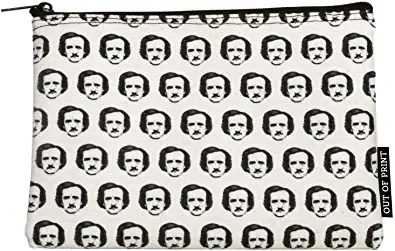

https://www.amazon.com/dp/B00MBWFLJK











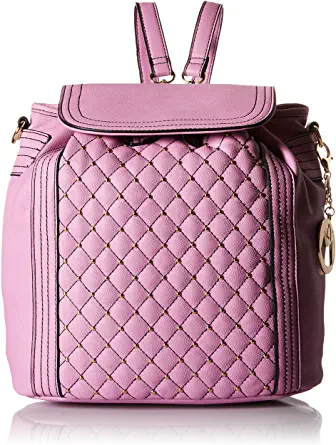

https://www.amazon.com/dp/B00B5ISO4A
https://images-na.ssl-images-amazon.com/images/I/91KSpXfrymL._AC_UY695_.jpg
https://www.amazon.com/dp/B00G2DA3YW
https://images-na.ssl-images-amazon.com/images/I/A1Xf4KbXz9L._AC_UX695_.jpg
https://www.amazon.com/dp/B00W9A8B78
https://images-na.ssl-images-amazon.com/images/I/71Pg1cl0y9L._AC_UY695_.jpg
https://www.amazon.com/dp/B00WBIGG0C
https://images-na.ssl-images-amazon.com/images/I/91HqLSmfXBL._AC_UY695_.jpg
https://www.amazon.com/dp/B0047FLWHE
https://images-na.ssl-images-amazon.com/images/I/81s4RO%2BMU3L._AC_UX695_.jpg
https://www.amazon.com/dp/B009B1CLJM
https://images-na.ssl-images-amazon.com/images/I/51TsZxSsheL._AC_UX695_.jpg
https://www.amazon.com/dp/B00K33RPZW
https://images-na.ssl-images-amazon.com/images/I/916Z0m9NDyL._AC_UX695_.jpg
https://www.amazon.com/dp/B00PKI02DM
https://images-na.ssl-images-amazon.com/images/I/81OroyOYgdL._AC_UX695_.jpg
https://www.amazon.com/dp/B00ZL9LQ3A
https://images-na.ssl-images-amazon.com/images/I/71QP3F3N

https://www.amazon.com/dp/B00FTENY4Q
https://images-na.ssl-images-amazon.com/images/I/61-hRsM6wtL._AC_UX695_.jpg
https://www.amazon.com/dp/B005448JOG
https://images-na.ssl-images-amazon.com/images/I/81l4pkRPqtL._AC_UY695_.jpg
https://www.amazon.com/dp/B00QT31RCM
https://images-na.ssl-images-amazon.com/images/I/91ER2%2BZNiIL._AC_UX695_.jpg
https://www.amazon.com/dp/B00DZI0D1U
https://images-na.ssl-images-amazon.com/images/I/71fsaG1qs6L._AC_UY695_.jpg
https://www.amazon.com/dp/B0087ZR2X8
https://images-na.ssl-images-amazon.com/images/I/71NI9PVW7dL._AC_UX679_.jpg
https://www.amazon.com/dp/B00847NV2K
https://images-na.ssl-images-amazon.com/images/I/613y8RclYhL._AC_UX679_.jpg
https://www.amazon.com/dp/B00WBHRHY2
https://images-na.ssl-images-amazon.com/images/I/71%2Bok0D7QVL._AC_UX695_.jpg
https://www.amazon.com/dp/B00FWRZ1BE
https://images-na.ssl-images-amazon.com/images/I/71GEJrHOoYL._AC_UY695_.jpg
https://www.amazon.com/dp/B001K9DPPC
https://images-na.ssl-images-amazon.com/images/I/71sS%2

https://www.amazon.com/dp/B001M62D7E
https://images-na.ssl-images-amazon.com/images/I/717WOHa3AdL._AC_UY695_.jpg
https://www.amazon.com/dp/B001GNBJ8M
https://images-na.ssl-images-amazon.com/images/I/A1BST9LhfqL._AC_UX679_.jpg
https://www.amazon.com/dp/B004IWRK86
https://images-na.ssl-images-amazon.com/images/I/81BeXUJ8QTL._AC_UX695_.jpg
https://www.amazon.com/dp/B00CHYGDPS
https://images-na.ssl-images-amazon.com/images/I/71z3cwM7LJL._AC_UX695_.jpg
https://www.amazon.com/dp/B00G2UW26C
https://images-na.ssl-images-amazon.com/images/I/317tfOVFV9L._AC_.jpg
https://www.amazon.com/dp/B00HG8287W
https://images-na.ssl-images-amazon.com/images/I/71TjI2MueQL._AC_UX695_.jpg
https://www.amazon.com/dp/B00B9FV3Y2
https://images-na.ssl-images-amazon.com/images/I/91igAKowxvL._AC_UX695_.jpg
https://www.amazon.com/dp/B002VXRFS4
https://images-na.ssl-images-amazon.com/images/I/31eJ-RMn6%2BL._AC_.jpg
https://www.amazon.com/dp/B00HIASPSE
https://images-na.ssl-images-amazon.com/images/I/81X635QVoFL._AC_UY69

In [ ]:
# get img_url
img_url_list = []
asin_list = []

for index, row in data.iterrows():
    url_path = 'https://www.amazon.com/dp/'
    url = url_path + row['asin']
    asin = row['asin']
    driver.get(url)
    content = driver.page_source
    time.sleep(2)
    soup = BeautifulSoup(content)
    for div in soup.find_all('div', id="imgTagWrapperId"):
        image=div.find('img', alt=True)
        print(url) 
        print(image['src'])
        img_url_list.append(image['src'])
        asin_list.append(asin)



## 3 Data Preprocessing by Removing Stop Words

In [24]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
stop_words = set(stopwords.words('english'))
print ('list of stop words:', stop_words)
def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        for words in total_text.split():
            # remove the special chars in review like '"#$@!%^&*()_+-~?>< etc.
            word = ("".join(e for e in words if e.isalnum()))
            # Conver all letters to lower-case
            word = word.lower()
            # stop-word removal
            if not word in stop_words:
                string += word + " "
        data[column][index] = string

list of stop words: {"mustn't", 'been', 'off', 'they', 'from', 'after', 'what', 're', 'doing', 'hasn', 'are', 'and', 'not', 'which', 'myself', 'more', 'how', 'then', 'there', 'your', 'our', "wouldn't", 'wasn', 'has', 'he', 'each', 'shouldn', 'why', 'it', 'all', 'mightn', 'm', 'above', 'his', 'its', "you'd", 't', 'aren', 'you', 'own', 'by', 'once', 'because', 'only', "won't", "isn't", "you've", 'y', 's', 'a', 'yourself', 'before', 'about', 'is', 'nor', 'here', 'just', 'who', 'did', 'were', 'hers', 'or', 'for', 'to', "it's", 'same', "should've", 'my', 'some', 'when', 'ain', 'needn', 'those', 'in', 'shan', 'be', "shan't", 'any', 'than', 'weren', "that'll", 'under', 'no', "doesn't", 'hadn', 'if', 'being', 'too', 'these', "couldn't", "shouldn't", 'yourselves', 'whom', 'will', 'can', 'where', "mightn't", 'themselves', 'don', 'on', 'through', 'into', 'out', "you're", 'the', 'doesn', 'does', 'so', 'other', "you'll", 'couldn', 'isn', 'with', 'at', 'further', 'her', 'again', 'we', 'of', 'll', 'b

In [26]:
start_time = time.clock()
# we take each title and we text-preprocess it.
for index, row in data.iterrows():
    nlp_preprocessing(row['title'], index, 'title')
# we print the time it took to preprocess whole titles 
print(time.clock() - start_time, "seconds")

4.670000000000001 seconds


In [27]:
data.head()

,Unnamed: 0,customer_id,asin,star_rating,product_title,helpful_votes,title,brand,image
0,19,52181093,B00TQ6L9TK,5,Travelon Convertible Hobo with RFID Protection,45,travelon convertible hobo rfid protection magenta,Travelon,https://images-na.ssl-images-amazon.com/images/I/41hiP0ngV1L._SS40_.jpg
1,32,23868997,B00K4VUL4A,2,"RIVBOS RBK003 Rubber Flexible Kids Polarized Sunglasses for Baby and Child,3-10 Age(Mirrored Lens Available)",1,rivbos rubber kids polarized sunglasses strap glasses shades boys girls baby children age 310 rbk003,RIVBOS,"https://images-na.ssl-images-amazon.com/images/I/51Cv3Xa86OL._SR38,50_.jpg"
2,50,12228192,B00M16OVQ0,5,Ralph Lauren Womens Chrissy Open Toe Casual Platform Sandals,4,lauren ralph lauren chrissy sandstone leather wedge sandal woman size 9 b,Lauren by Ralph Lauren,https://images-na.ssl-images-amazon.com/images/I/41dXm2PPUyL._US40_.jpg
3,54,12228192,B009YN3TLG,5,Giani Bernini Sicilia Women Round Toe Suede Mid Calf Boot,1,giani bernini sicilia women round toe suede mid calf boot,Giani Bernini,https://images-na.ssl-images-amazon.com/images/I/41ulRXUoV5L._US40_.jpg
4,132,43450674,B00K0PZ1Y0,5,OrthoStep Metal Shoe Horn [7.5”] – Preserve The Heel Of Your Shoe – Make Every Piece Of Foot Wear Slip-On Friendly - Made in the USA,1,orthostep metal shoe horn 75 inch made usa,OrthoStep,https://images-na.ssl-images-amazon.com/images/I/41qdVPhEYQL._US40_.jpg


In [28]:
print(data.shape[0])

7586


In [29]:
title_vectorizer = CountVectorizer()
title_features   = title_vectorizer.fit_transform(data['title'])
title_features.get_shape()

(7586, 15517)

## 4 Creating the IDF weighted Word2Vec Title, Brand Using One Hot Encoder

### Defining the features 

### 4.1 IDF Title Features and W2V Title Features

In [30]:
idf_title_vectorizer = CountVectorizer()
idf_title_features = idf_title_vectorizer.fit_transform(data['title'])


#### Defining the Features for Brands and Color 

In [31]:
# some of the brand values are empty. 
# Need to replace Null with string "NULL"
data['brand'].fillna(value="Not given", inplace=True )

# replace spaces with hypen
brands = [x.replace(" ", "-") for x in data['brand'].values]

# colors = [x.replace(" ", "-") for x in data['color'].values]

#One-Hot Encoding using Count vectorizer
brand_vectorizer = CountVectorizer()
brand_features = brand_vectorizer.fit_transform(brands)

# color_vectorizer = CountVectorizer()
# color_features = color_vectorizer.fit_transform(colors)

#### Defining the Features for Visuals

In [32]:
#load the features and corresponding ASINS info.
# bottleneck_features_train = np.load('Apparel-Recommendation-System-master/data_1_cnn_features.npy')
# asins = np.load('Apparel-Recommendation-System-master/data_1_cnn_feature_asins.npy')
# asins = list(asins)

# load the original 16K dataset
# data = pd.read_pickle('pickels/16k_apperal_data_preprocessed')
# df_asins = list(data['asin'])

#### 4.1.1 Utility Functions for the IDF Word2Vec Weighted Title

In [33]:
word2vec_model = r'w2v/word2vec_model'

In [34]:
def get_word_vec(sentence, doc_id, m_name):
    # sentence : title of the apparel
    # doc_id: document id in our corpus
    # m_name: model information it will take two values
        # if  m_name == 'avg', we will append the model[i], w2v representation of word i
        # if m_name == 'weighted', we will multiply each w2v[word] with the idf(word)
    vec = []
    for i in sentence.split():
        if i in vocab:
            if m_name == 'weighted' and i in  idf_title_vectorizer.vocabulary_:
                vec.append(idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[i]] * model[i])
            elif m_name == 'avg':
                vec.append(model[i])
        else:
            # if the word in our courpus is not there in the google word2vec corpus,just ignoring it
            vec.append(np.zeros(shape=(300,)))
    # return a numpy array of shape (#number of words in title * 300 ) 300 = len(w2v_model[word])
    # each row represents the word2vec representation of each word (weighted/avg) in given sentance 
    return  np.array(vec)

In [35]:
# this function will add the vectors of each word and returns the avg vector of given sentance
def build_avg_vec(sentence, num_features, doc_id, m_name):
    # sentace: its title of the apparel
    # num_features: the lenght of word2vec vector, its values = 300
    # m_name: model information it will take two values
        # if  m_name == 'avg',append the model[i], w2v representation of word i
        # if m_name == 'weighted',multiply each w2v[word] with the idf(word)

    featureVec = np.zeros((num_features,), dtype="float32")
    #intialize a vector of size 300 with all zeros
    #add each word2vec(wordi) to this fetureVec
    nwords = 0
    
    for word in sentence.split():
        nwords += 1
        if word in vocab:
            if m_name == 'weighted' and word in  idf_title_vectorizer.vocabulary_:
                featureVec = np.add(featureVec, idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[word]] * model[word])
            elif m_name == 'avg':
                featureVec = np.add(featureVec, model[word])
    if(nwords>0):
        featureVec = np.divide(featureVec, nwords)
    # returns the avg vector of given sentance, its of shape (1, 300)
    return featureVec

In [36]:
data.to_pickle('pickles/7.5K_data')

In [37]:
data = pd.read_pickle('pickles/7.5K_data')

In [38]:
with open(word2vec_model, 'rb') as handle:
    model = pickle.load(handle)
# vocab = stores all the words that are there in google w2v model
vocab = model.keys()
doc_id = 0
w2v_title_weight = []
# for every title build a weighted vector representation
for i in data['title']:
    w2v_title_weight.append(build_avg_vec(i, 300, doc_id,'weighted'))
    doc_id += 1
# w2v_title = np.array(# number of doc in courpus * 300), each row corresponds to a doc 
w2v_title_weight = np.array(w2v_title_weight)

In [39]:
def n_containing(word):
    # return the number of documents which had the given word
    return sum(1 for blob in data['title'] if word in blob.split())

def idf(word):
    # idf = log(#number of docs / #number of docs which had the given word)
    return math.log(data.shape[0] / (n_containing(word)))

In [40]:
data.to_pickle('pickles/7.5K_data')

In [41]:
data = pd.read_pickle('pickles/7.5K_data')

In [42]:
# need to convert the values into float
idf_title_features  = idf_title_features.astype(np.float)

for i in idf_title_vectorizer.vocabulary_.keys():
    # for every word in whole corpus will find its idf value
    idf_val = idf(i)
    
    # to calculate idf_title_features need to replace the count values with the idf values of the word
    # idf_title_features[:, idf_title_vectorizer.vocabulary_[i]].nonzero()[0] will return all documents in which the word i present
    for j in idf_title_features[:, idf_title_vectorizer.vocabulary_[i]].nonzero()[0]:
        
        # replace the count values of word i in document j with  idf_value of word i 
        # idf_title_features[doc_id, index_of_word_in_courpus] = idf value of word
        idf_title_features[j,idf_title_vectorizer.vocabulary_[i]] = idf_val

In [43]:
def get_distance(vec1, vec2):
    # vec1 = np.array(#number_of_words_title1 * 300), each row is a vector of length 300 corresponds to each word in give title
    # vec2 = np.array(#number_of_words_title2 * 300), each row is a vector of length 300 corresponds to each word in give title
    
    final_dist = []
    # for each vector in vec1  caluclate the distance(euclidean) to all vectors in vec2
    for i in vec1:
        dist = []
        for j in vec2:
            # np.linalg.norm(i-j) will result the euclidean distance between vectors i, j
            dist.append(np.linalg.norm(i-j))
        final_dist.append(np.array(dist))
    # final_dist = np.array(#number of words in title1 * #number of words in title2)
    # final_dist[i,j] = euclidean distance between vectors i, j
    return np.array(final_dist)

In [44]:
# def display_img(url,ax,fig):
#     try:
#         #get the url of the apparel and download it
#         response = requests.get(url)
#         img = PilImage.open(BytesIO(response.content))
#         #display it in notebook 
#         plt.imshow(img)
#     except 

In [45]:
img_name = []

In [46]:
jh_path = './Data/shoes_pred_with_ImgURL_v3.csv'
jh_df = pd.read_csv(jh_path, index_col=0)
jh_df = jh_df.drop_duplicates(subset=['asin'])
asin_list = jh_df['asin']
# asin_list

In [47]:
#The Below code is is for the weighted IDF Word2Vec 
def heat_map_w2v(sentence1, sentence2, url, asin1, asin2, doc_id1, doc_id2, model):
    # sentance1 : title1, input apparel
    # sentance2 : title2, recommended apparel
    # url: apparel image url
    # doc_id1: document id of input apparel
    # doc_id2: document id of recommended apparel
    # model: it can have two values, 1. avg 2. weighted
    
    #s1_vec = np.array(#number_of_words_title1 * 300), each row is a vector(weighted/avg) of length 300 corresponds to each word in give title
    s1_vec = get_word_vec(sentence1, doc_id1, model)
    #s2_vec = np.array(#number_of_words_title1 * 300), each row is a vector(weighted/avg) of length 300 corresponds to each word in give title
    s2_vec = get_word_vec(sentence2, doc_id2, model)

    # s1_s2_dist = np.array(#number of words in title1 * #number of words in title2)
    # s1_s2_dist[i,j] = euclidean distance between words i, j
    s1_s2_dist = get_distance(s1_vec, s2_vec)

    
    
    # devide whole figure into 2 parts 1st part displays heatmap 2nd part displays image of apparel
#     gs = gridspec.GridSpec(2, 2, width_ratios=[4,1],height_ratios=[2,1]) 
    fig = plt.figure(figsize=(10,10))
    
#     ax = plt.subplot(gs[0])
    # ploting the heap map based on the pairwise distances
    ax = sns.heatmap(np.round(s1_s2_dist,4), annot=True)
    # set the x axis labels as recommended apparels title
    ax.set_xticklabels(sentence2.split())
    # set the y axis labels as input apparels title
    ax.set_yticklabels(sentence1.split())
    # set title as recommended apparels title
    ax.set_title(sentence2)
    if asin2 in asin_list:
        
        filedir = './w2v_matrices/'
        img_name = filedir + asin1 + '-' + asin2 + '.jpg'

        print(f'saving {img_name}')
        plt.savefig(img_name)
    
#     ax = plt.subplot(gs[1])
# #     remove all grids and axis labels for image
#     ax.grid(False)
#     ax.set_xticks([])
#     ax.set_yticks([])
#     display_img(url, ax, fig)
    
    
        plt.show()
    

In [48]:
feat_asin_list = []
rec_asin_list = []
distance_list = []
# image_list = []

In [49]:
def weighted_w2v_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus
    
    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    # the metric used here is cosine, the coside distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    # http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
    pairwise_dist = pairwise_distances(w2v_title_weight, w2v_title_weight[doc_id].reshape(1,-1))

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])
    
    for i in range(0, len(indices)):

        heat_map_w2v(data['title'].loc[df_indices[0]],data['title'].loc[df_indices[i]], data['image'].loc[df_indices[i]], data['asin'].loc[df_indices[0]], data['asin'].loc[df_indices[i]], indices[0], indices[i], 'weighted')
        
        feat_asin_list.append(data['asin'].loc[df_indices[0]])
        rec_asin_list.append(data['asin'].loc[df_indices[i]])
        distance_list.append(pdists[i])

        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('Brand :',data['brand'].loc[df_indices[i]])
        print('euclidean distance from input :', pdists[i])
        print('='*125)

In [50]:
from PIL import Image as PilImage

In [ ]:
for i in range(7586):
    print('')
    print(i)
    weighted_w2v_model(i, 5)


0
ASIN : B00TQ6L9TK
Brand : Travelon
euclidean distance from input : 0.00069053395
ASIN : B00KLISY7W
Brand : The Sak
euclidean distance from input : 0.92463344
ASIN : B00007GDBC
Brand : Buxton
euclidean distance from input : 0.95482624
ASIN : B006QG8LLW
Brand : The Sak
euclidean distance from input : 0.9596844
ASIN : B00FT2UF0O
Brand : Coach
euclidean distance from input : 0.99532866

1
ASIN : B00K4VUL4A
Brand : RIVBOS
euclidean distance from input : 0.00048828125
ASIN : B00K4VLT8M
Brand : RIVBOS
euclidean distance from input : 0.15142192
ASIN : B00EJQSH74
Brand : moda
euclidean distance from input : 0.60709846
ASIN : B00AZOH842
Brand : X-Loop
euclidean distance from input : 0.6440129
ASIN : B00K4VUL3G
Brand : RIVBOS
euclidean distance from input : 0.67579424

2
ASIN : B00M16OVQ0
Brand : Lauren by Ralph Lauren
euclidean distance from input : 0.0008457279
ASIN : B006E4C5TK
Brand : RALPH LAUREN
euclidean distance from input : 0.8229474
ASIN : B00JDR7NV0
Brand : Lauren by Ralph Lauren
eu

In [ ]:
# len(feat_asin_list)

In [ ]:
# len(rec_asin_list)

In [ ]:
# len(distance_list)

In [ ]:
# df = pd.DataFrame(columns = ['Featured Item', 'Recommended Item', 'Eucledian Distance'])

In [ ]:
# df['Featured Item'] = feat_asin_list

In [ ]:
# df['Recommended Item'] = rec_asin_list

In [ ]:
# df['Eucledian Distance'] = distance_list

In [ ]:
# df.head()

In [ ]:
# df.to_csv('nlp_output.csv')

In [ ]:
jh_path = './Data/shoes_pred_with_ImgURL_v3.csv'

In [ ]:
jh_df = pd.read_csv(jh_path, index_col=0)

In [ ]:
jh_df.head()

In [ ]:
jh_df = jh_df.drop_duplicates(subset=['asin'])
jh_df.shape

In [ ]:
for i in range(7586):


In [ ]:
# df = df.rename(columns={'Featured Item': 'asin'})
# df.head()

In [ ]:
# df_merge_jh = pd.merge(df, jh_df, how='inner', on='asin')

In [ ]:
# df_merge_jh.shape

In [ ]:
# df_merge_jh

In [ ]:
# df_merge_jh.to_csv('merged_jh_nlp.csv')

In [ ]:
# merged_list = df_merge_jh['asin']

In [ ]:
# data = data[data['asin'].isin(df_merge_jh['asin'])]

In [ ]:
# data.reset_index()

In [ ]:
# data.shape

In [ ]:
jh_df.head()

In [ ]:
def weighted_w2v_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus
    
    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    # the metric used here is cosine, the coside distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    # http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
    pairwise_dist = pairwise_distances(w2v_title_weight, w2v_title_weight[doc_id].reshape(1,-1))

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])
    

    for i in range(0, len(indices)):
        heat_map_w2v(data['product_title'].loc[df_indices[0]],data['product_title'].loc[df_indices[i]], data['image'].loc[df_indices[i]], data['asin'].loc[df_indices[0]], data['asin'].loc[df_indices[i]], indices[0], indices[i], 'weighted')

        feat_asin_list.append(data['asin'].loc[df_indices[0]])
        rec_asin_list.append(data['asin'].loc[df_indices[i]])
        distance_list.append(pdists[i])

        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('Title :',data['product_title'].loc[df_indices[i]])
        print('euclidean distance from input :', pdists[i])
        print('='*125)

In [ ]:
new = data['asin'].isin(jh_df['asin'])

In [ ]:
data = data[new]
data.reset_index()

In [ ]:
data.shape

In [ ]:
for i in range(47):
        print('')
        print(i)
        weighted_w2v_model(i, 10)